In [ ]:
import os
import sys
os.environ["PYSPARK_PYTHON"]='/opt/anaconda/envs/bd9/bin/python'
os.environ["SPARK_HOME"]='/usr/hdp/current/spark2-client'
os.environ["PYSPARK_SUBMIT_ARGS"]='--num-executors 3 pyspark-shell'

spark_home = os.environ.get('SPARK_HOME', None)

sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.7-src.zip'))

In [2]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

conf = SparkConf()
conf.set("spark.app.name", "natasha pritykovskaya ML app") 

spark = SparkSession.builder.config(conf=conf).getOrCreate()

In [3]:
from IPython.display import Image

## Pipeline

+ **DataFrame**: ML API использует DataFrame из Spark SQL как dataset, в котором могут храниться признаки, метки классов, предсказания.


+ **Transformer**: Transformer это алгоритм, который может преобразовать один DataFrame в другой DataFrame. Например, ML model это Transformer, который преобразовывает DataFrame с признаками в другой DataFrame с предсказаниями.


+ **Estimator**: Estimator это алгоритм, который может быть обучен на DataFrame, чтобы создать Transformer. Например, алгоритм обучения это - Estimator, который обучается на DataFrame и создает модель.


+ **Pipeline**: Pipeline соединяет в цепочку несколько Transformers и Estimators вместе, чтобы задать ML workflow.


+ **Parameter**: Все Transformers и Estimators теперь имеют общее API для спецификации параметров.

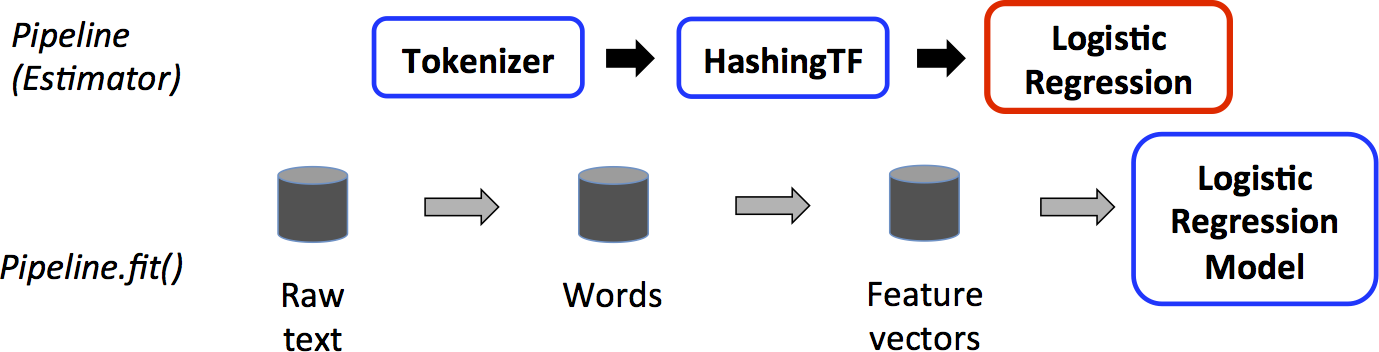

In [4]:
Image("pics/ml-Pipeline.png")

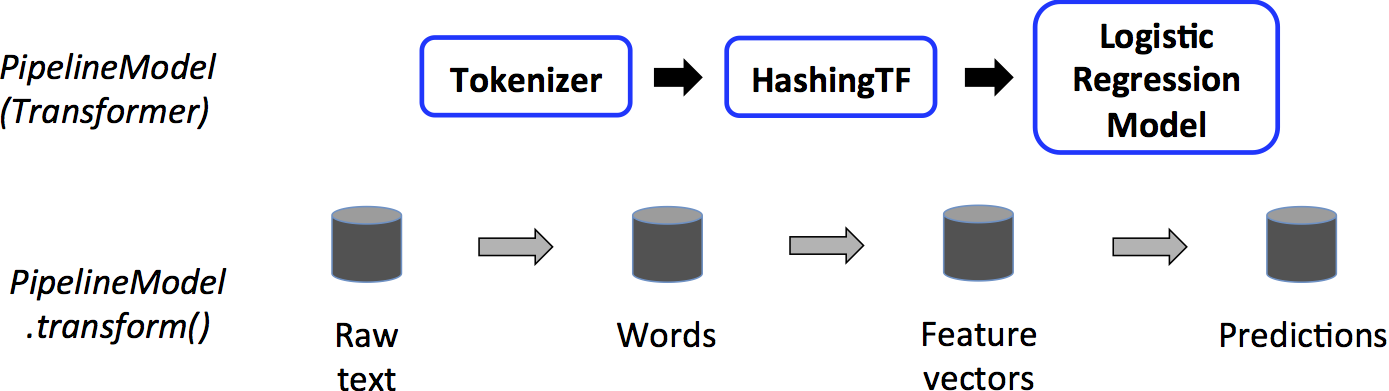

In [5]:
Image("pics/ml-PipelineModel.png")

In [6]:
from pyspark.ml.linalg import Vectors

In [7]:
from pyspark.ml.classification import LogisticRegression

In [8]:
training_set = spark.createDataFrame([
    (1.0, Vectors.dense([0.0, 1.1, 0.1])),
    (0.0, Vectors.dense([2.0, 1.0, -1.0])),
    (0.0, Vectors.dense([2.0, 1.3, 1.0])),
    (1.0, Vectors.dense([0.0, 1.2, -0.5]))], schema = ["label", "features"])

In [9]:
training_set.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [10]:
from pyspark.sql.types import StructType, StructField, DoubleType
from pyspark.ml.linalg import VectorUDT

In [11]:
schema = StructType(fields=[
    StructField("label", DoubleType()),
    StructField("features", VectorUDT()),
])

In [12]:
training_set = spark.createDataFrame([
    (1.0, Vectors.dense([0.0, 1.1, 0.1])),
    (0.0, Vectors.dense([2.0, 1.0, -1.0])),
    (0.0, Vectors.dense([2.0, 1.3, 1.0])),
    (1.0, Vectors.dense([0.0, 1.2, -0.5]))], schema=schema)

In [13]:
training_set.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [14]:
lr = LogisticRegression(maxIter=10, regParam=0.01)

In [15]:
lr

LogisticRegression_003c8798363d

In [16]:
lr.params

[Param(parent='LogisticRegression_003c8798363d', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'),
 Param(parent='LogisticRegression_003c8798363d', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'),
 Param(parent='LogisticRegression_003c8798363d', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'),
 Param(parent='LogisticRegression_003c8798363d', name='featuresCol', doc='features column name.'),
 Param(parent='LogisticRegression_003c8798363d', name='fitIntercept', doc='whether to fit an intercept term.'),
 Param(parent='LogisticRegression_003c8798363d', name='labelCol', doc='label column name.'),
 Param(parent='LogisticRegression_003c8798363d', name='lowerBoundsOnCoefficients', doc='The lower bounds on coefficients if fitting under bound cons

# Что за регуляризационный параметр тут используется?

In [17]:
lr.getOrDefault("regParam")

0.01

In [18]:
lr.getOrDefault("standardization")

True

In [19]:
model = lr.fit(training_set)

In [20]:
type(model)

pyspark.ml.classification.LogisticRegressionModel

In [21]:
dir(model)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_call_java',
 '_clear',
 '_copyValues',
 '_copy_params',
 '_create_from_java_class',
 '_create_params_from_java',
 '_defaultParamMap',
 '_dummy',
 '_empty_java_param_map',
 '_from_java',
 '_java_obj',
 '_make_java_param_pair',
 '_new_java_array',
 '_new_java_obj',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_to_java',
 '_transfer_param_map_from_java',
 '_transfer_param_map_to_java',
 '_transfer_params_from_java',
 '_transfer_params_to_java',
 '_transform',
 'aggregationDepth',
 'coefficientMatrix',
 'coefficients',
 'copy

In [22]:
model.coefficients

DenseVector([-3.1009, 2.6082, -0.3802])

In [23]:
model.interceptVector

DenseVector([0.0682])

In [34]:
predict = model.transform(training_set)

In [35]:
predict.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [36]:
training_set.show(1)

+-----+-------------+
|label|     features|
+-----+-------------+
|  1.0|[0.0,1.1,0.1]|
+-----+-------------+
only showing top 1 row



In [37]:
predict.show(1, truncate=False, vertical=True)

-RECORD 0--------------------------------------------------
 label         | 1.0                                       
 features      | [0.0,1.1,0.1]                             
 rawPrediction | [-2.899194894638035,2.899194894638035]    
 probability   | [0.052193376663007225,0.9478066233369927] 
 prediction    | 1.0                                       
only showing top 1 row



In [38]:
model.getOrDefault("threshold")

0.5

## Toxic Comment Classification Challenge

In [39]:
from pyspark.sql.types import StringType, IntegerType

In [40]:
schema = StructType([
    StructField("id", StringType()),
    StructField("comment_text", StringType()),
    StructField("toxic", IntegerType()),
    StructField("severe_toxic", IntegerType()),
    StructField("obscene", IntegerType()),
    StructField("threat", IntegerType()),
    StructField("insult", IntegerType()),
    StructField("identity_hate", IntegerType())
])

In [41]:
! hdfs dfs -head /lectures/lecture03/data/train.csv

"id","comment_text","toxic","severe_toxic","obscene","threat","insult","identity_hate"
"0000997932d777bf","Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
"000103f0d9cfb60f","D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
"000113f07ec002fd","Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
"0001b41b1c6bb37e","""
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents""""  -I think the refere

In [42]:
dataset = spark.read.csv("/lectures/lecture03/data/train.csv", schema=schema, header=True)

In [43]:
dataset.show(2, vertical=True)

-RECORD 0-----------------------------
 id            | 0000997932d777bf     
 comment_text  | Explanation          
 toxic         | null                 
 severe_toxic  | null                 
 obscene       | null                 
 threat        | null                 
 insult        | null                 
 identity_hate | null                 
-RECORD 1-----------------------------
 id            | Why the edits mad... 
 comment_text  |  just closure on ... 
 toxic         | 0                    
 severe_toxic  | 0                    
 obscene       | 0                    
 threat        | 0                    
 insult        | 0                    
 identity_hate | 0                    
only showing top 2 rows



## Был баг с multiline CSVs, fix в  2.2.0 https://issues.apache.org/jira/browse/SPARK-19610

In [44]:
dataset = spark.read.csv("/lectures/lecture03/data/train.csv",
                         schema=schema, header=True, multiLine=True)

In [45]:
dataset.show(2, vertical=True)

-RECORD 0-----------------------------
 id            | 0000997932d777bf     
 comment_text  | Explanation
Why t... 
 toxic         | 0                    
 severe_toxic  | 0                    
 obscene       | 0                    
 threat        | 0                    
 insult        | 0                    
 identity_hate | 0                    
-RECORD 1-----------------------------
 id            | 000103f0d9cfb60f     
 comment_text  | D'aww! He matches... 
 toxic         | 0                    
 severe_toxic  | 0                    
 obscene       | 0                    
 threat        | 0                    
 insult        | 0                    
 identity_hate | 0                    
only showing top 2 rows



In [46]:
dataset.select("id").show(10)

+--------------------+
|                  id|
+--------------------+
|    0000997932d777bf|
|    000103f0d9cfb60f|
|    000113f07ec002fd|
|    0001b41b1c6bb37e|
|                More|
|I can't make any ...|
|There appears to ...|
|    0001d958c54c6e35|
|    00025465d4725e87|
|Congratulations f...|
+--------------------+
only showing top 10 rows



## Необходимо добавить `escape` параметр!

In [47]:
dataset = spark.read.csv("/lectures/lecture03/data/train.csv",
                         schema=schema, header=True, multiLine=True, escape='"')

In [48]:
dataset.select("id").show(10)

+----------------+
|              id|
+----------------+
|0000997932d777bf|
|000103f0d9cfb60f|
|000113f07ec002fd|
|0001b41b1c6bb37e|
|0001d958c54c6e35|
|00025465d4725e87|
|0002bcb3da6cb337|
|00031b1e95af7921|
|00037261f536c51d|
|00040093b2687caa|
+----------------+
only showing top 10 rows



In [49]:
dataset.show(2, vertical=True, truncate=False)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 id            | 0000997932d777bf                                                                                                                                                                                                                                                         
 comment_text  | Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27 
 toxic         | 0                                                                                                                                     

In [50]:
dataset.rdd.getNumPartitions()

1

In [51]:
dataset.count()

159571

In [52]:
dataset = dataset.repartition(6)

## Определим бинарный target (toxic/non-toxic)

In [53]:
from pyspark.sql import functions as f

In [54]:
target = f.when(
    (dataset.toxic == 0) &
    (dataset.severe_toxic == 0) &
    (dataset.obscene == 0) &
    (dataset.threat == 0) &
    (dataset.insult == 0) &
    (dataset.identity_hate == 0),
    0
).otherwise(1)

In [55]:
dataset = dataset.withColumn("target", target)

In [56]:
dataset.select("id", "target").show(20)

+----------------+------+
|              id|target|
+----------------+------+
|b63771a6dd0bc63c|     0|
|844520719ae75ca9|     1|
|1b3a6936a549fb69|     0|
|6003fc22945ddfb6|     0|
|63d49f7a1ffb31e8|     0|
|1e805d4e1304aad4|     0|
|ce1e5dea4c45912d|     0|
|a3ea316c7d95167e|     0|
|94691a813924fe0f|     0|
|3573f61a933678ee|     0|
|034f7ba2351c5a38|     0|
|cab9f6387bb3fd64|     0|
|ba87d5df3f47429e|     0|
|45585126e98979ce|     0|
|4568b9331bf01036|     0|
|7b72a08795a83640|     0|
|b53491d58107afcd|     0|
|255d9c6bfcf47d03|     0|
|896bb2c5dd2d26ed|     0|
|de3c112d4f18ca80|     1|
+----------------+------+
only showing top 20 rows



In [57]:
dataset.filter(f.col("id") == "1ec645e199a530fa").show(2, vertical=True, truncate=False)

-RECORD 0-----------------------------------------------------------------------------------------------------
 id            | 1ec645e199a530fa                                                                             
 comment_text  | May I also add that you're a cock and you should find something better to do with your time. 
 toxic         | 0                                                                                            
 severe_toxic  | 0                                                                                            
 obscene       | 1                                                                                            
 threat        | 0                                                                                            
 insult        | 1                                                                                            
 identity_hate | 0                                                                                            
 

In [58]:
dataset.groupBy("target").count().collect()

[Row(target=1, count=16225), Row(target=0, count=143346)]

In [59]:
16225 / (16225 + 143346)

0.10167887648758234

In [60]:
dataset = dataset.drop("toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate").cache()

In [61]:
dataset.count()

159571

In [62]:
dataset.show(2, False, True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [63]:
dataset.write.parquet("/user/natalya.pritykovskaya/comments_dataset", mode="overwrite")

## Обучим самую простую binary logistic regression

In [64]:
from pyspark.ml.feature import Tokenizer, HashingTF

## Преобразуем комметарии в слова

In [65]:
tokenizer = Tokenizer(inputCol="comment_text", outputCol="words")

In [66]:
dataset2 = tokenizer.transform(dataset)

In [67]:
dataset2.select("id", "words").show(2, False, True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [68]:
dataset2.take(1)

[Row(id='26e1b63617df36b1', comment_text='"\n\n charlie wilson \n\ni didnt notice the music genres that were reverted. However my intention was to revert his alias that you deleted.  His alias a.k.a is actually ""Uncle Charlie"" and needs to be put back and shouldn\'t  have been removed."', target=0, words=['"', '', '', 'charlie', 'wilson', '', '', 'i', 'didnt', 'notice', 'the', 'music', 'genres', 'that', 'were', 'reverted.', 'however', 'my', 'intention', 'was', 'to', 'revert', 'his', 'alias', 'that', 'you', 'deleted.', '', 'his', 'alias', 'a.k.a', 'is', 'actually', '""uncle', 'charlie""', 'and', 'needs', 'to', 'be', 'put', 'back', 'and', "shouldn't", '', 'have', 'been', 'removed."'])]

In [69]:

type(dataset2.take(1))

list

In [70]:
type(dataset2.take(1)[0])

pyspark.sql.types.Row

In [71]:
type(dataset2.take(1)[0].words)

list

In [72]:
dataset2.take(1)[0].words

['"',
 '',
 '',
 'charlie',
 'wilson',
 '',
 '',
 'i',
 'didnt',
 'notice',
 'the',
 'music',
 'genres',
 'that',
 'were',
 'reverted.',
 'however',
 'my',
 'intention',
 'was',
 'to',
 'revert',
 'his',
 'alias',
 'that',
 'you',
 'deleted.',
 '',
 'his',
 'alias',
 'a.k.a',
 'is',
 'actually',
 '""uncle',
 'charlie""',
 'and',
 'needs',
 'to',
 'be',
 'put',
 'back',
 'and',
 "shouldn't",
 '',
 'have',
 'been',
 'removed."']

# Hashing trick vs CountVectorizer

In [73]:
df = spark.createDataFrame([
    (0, "PYTHON HIVE HIVE".split(" ")),
    (1, "JAVA JAVA SQL".split(" "))
], ["id", "words"])
df.show(truncate = False)

+---+--------------------+
|id |words               |
+---+--------------------+
|0  |[PYTHON, HIVE, HIVE]|
|1  |[JAVA, JAVA, SQL]   |
+---+--------------------+



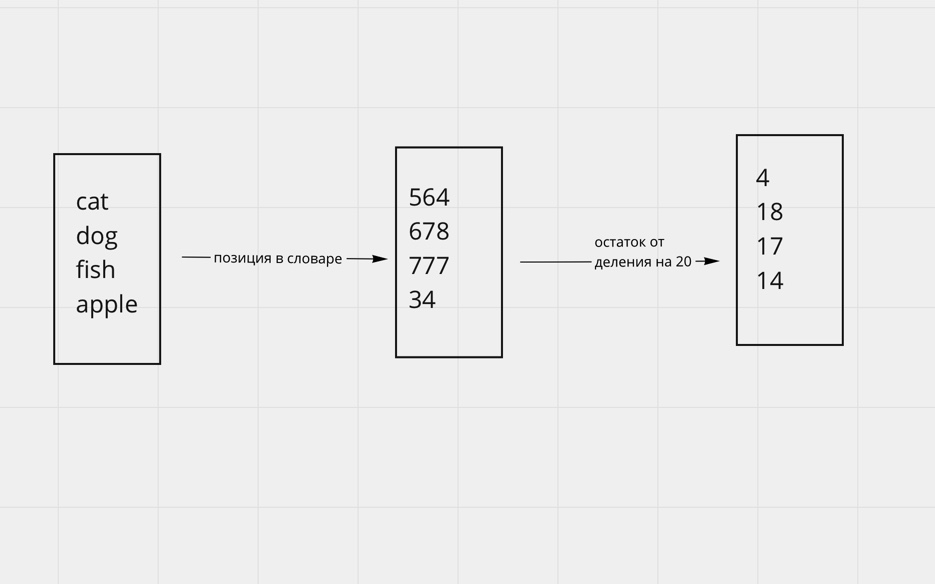

In [74]:
Image("pics/has_exmaple.jpeg")

In [75]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol="words", outputCol="features")
model = cv.fit(df)
result = model.transform(df)
result.show(truncate=False)

+---+--------------------+-------------------+
|id |words               |features           |
+---+--------------------+-------------------+
|0  |[PYTHON, HIVE, HIVE]|(4,[0,3],[2.0,1.0])|
|1  |[JAVA, JAVA, SQL]   |(4,[1,2],[2.0,1.0])|
+---+--------------------+-------------------+



In [76]:
from pyspark.ml.feature import HashingTF
ht = HashingTF(inputCol="words", outputCol="features", numFeatures=4)
result = ht.transform(df)
result.show(truncate=False)

+---+--------------------+-------------------+
|id |words               |features           |
+---+--------------------+-------------------+
|0  |[PYTHON, HIVE, HIVE]|(4,[0],[3.0])      |
|1  |[JAVA, JAVA, SQL]   |(4,[2,3],[1.0,2.0])|
+---+--------------------+-------------------+



In [77]:
from pyspark.ml.feature import HashingTF
ht = HashingTF(inputCol="words", outputCol="features", numFeatures=20)
result = ht.transform(df)
result.show(truncate=False)

+---+--------------------+---------------------+
|id |words               |features             |
+---+--------------------+---------------------+
|0  |[PYTHON, HIVE, HIVE]|(20,[0,12],[2.0,1.0])|
|1  |[JAVA, JAVA, SQL]   |(20,[2,19],[1.0,2.0])|
+---+--------------------+---------------------+



## Преобразуем тексты в бинарные вектора, используя hashing trick

In [78]:
hasher = HashingTF(numFeatures=100, binary=True, inputCol=tokenizer.getOutputCol(), outputCol="word_vector")

In [79]:
dataset2 = hasher.transform(dataset2)

In [80]:
dataset2.select("id", "word_vector").show(2, False, True)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 id          | 26e1b63617df36b1                                                                                                                                                                                                                                                                                                                                                                                

In [81]:
hasher_freq = HashingTF(numFeatures=100, binary=False, inputCol=tokenizer.getOutputCol(), outputCol="word_vector_freq")
dataset2_freq = hasher_freq.transform(dataset2)

In [82]:
dataset2_freq.select("id", "word_vector_freq").show(2, False, True)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 id               | 26e1b63617df36b1                                                                                                                                                                                                                                                                                                                                                               

## Разобъем наши данные на train и test, не забывая о том, что классы не сбалансированные

In [83]:
train = dataset2.sampleBy("target", fractions={0: 0.8, 1: 0.8}, seed=5757)

In [84]:
train.groupby("target").count().collect()

[Row(target=1, count=13039), Row(target=0, count=114841)]

In [85]:
13039 / (13039 + 114841)

0.10196277760400375

In [86]:
test = dataset2.join(train, on="id", how="leftanti")

In [87]:
test.groupby("target").count().collect()

[Row(target=1, count=3186), Row(target=0, count=28505)]

In [88]:
3186 / (3186 + 28505)

0.10053327443122653

In [89]:
train.rdd.getNumPartitions()

6

In [90]:
test.rdd.getNumPartitions()

200

In [91]:
train

DataFrame[id: string, comment_text: string, target: int, words: array<string>, word_vector: vector]

In [92]:
train = train.drop("comment_text", "words").cache()

In [93]:
test = test.drop("comment_text", "words").coalesce(4).cache()

## Обучим logistic regression

In [94]:
from pyspark.ml.classification import LogisticRegression

In [95]:
lr = LogisticRegression(featuresCol=hasher.getOutputCol(), labelCol="target", maxIter=15)

In [96]:
lr_model = lr.fit(train)

In [97]:
lr_model

LogisticRegressionModel: uid = LogisticRegression_b0c76cad19ea, numClasses = 2, numFeatures = 100

In [98]:
predictions = lr_model.transform(test)

In [99]:
predictions

DataFrame[id: string, target: int, word_vector: vector, rawPrediction: vector, probability: vector, prediction: double]

In [100]:
predictions.select("id", "target", "prediction", "probability", "rawPrediction").show(5, False, True)

-RECORD 0-------------------------------------------------
 id            | 00b4fb897de56d6d                         
 target        | 0                                        
 prediction    | 0.0                                      
 probability   | [0.8189105639106224,0.1810894360893775]  
 rawPrediction | [1.5089838450473225,-1.5089838450473225] 
-RECORD 1-------------------------------------------------
 id            | 0149abcca732f2e7                         
 target        | 0                                        
 prediction    | 0.0                                      
 probability   | [0.9605390275265026,0.03946097247349746] 
 rawPrediction | [3.1921824690643006,-3.1921824690643006] 
-RECORD 2-------------------------------------------------
 id            | 04a694ffe26cbaee                         
 target        | 0                                        
 prediction    | 0.0                                      
 probability   | [0.8034374487099057,0.19656255129009423

In [101]:
correct_predictions = predictions.select("target", f.col("prediction").cast("int")).filter("target == prediction").count()

correct_predictions

28549

In [102]:
all_predictions = predictions.count()

all_predictions

31691

In [103]:
print("Accuracy is {}".format(correct_predictions / all_predictions))

Accuracy is 0.9008551323719668


In [104]:
predictions.select("target", f.col("prediction").cast("int"))\
           .filter((f.col("target") == 1) & (f.col("prediction") == f.col("target")))\
           .count()

123

In [105]:
predictions_pd = predictions.select("target", f.col("prediction").cast("int")).toPandas()

In [106]:
predictions_pd.head()

,target,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [107]:
lr.getOrDefault("threshold")

0.5

In [108]:
from sklearn.metrics import classification_report, precision_score

In [109]:
print(classification_report(predictions_pd.target, predictions_pd.prediction))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     28505
          1       0.61      0.04      0.07      3186

avg / total       0.87      0.90      0.86     31691



## Что, если мы хотим более надежные метрики?

In [118]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [111]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="target", metricName='areaUnderROC')

In [112]:
predictions.show(4)

+----------------+------+--------------------+--------------------+--------------------+----------+
|              id|target|         word_vector|       rawPrediction|         probability|prediction|
+----------------+------+--------------------+--------------------+--------------------+----------+
|00b4fb897de56d6d|     0|(100,[0,3,7,18,22...|[1.50898384504732...|[0.81891056391062...|       0.0|
|0149abcca732f2e7|     0|(100,[0,1,2,4,5,6...|[3.19218246906430...|[0.96053902752650...|       0.0|
|04a694ffe26cbaee|     0|(100,[17,26,41,49...|[1.40791862579187...|[0.80343744870990...|       0.0|
|060b71df0877671d|     0|(100,[4,6,10,15,2...|[3.06810762510181...|[0.95555787813337...|       0.0|
+----------------+------+--------------------+--------------------+--------------------+----------+
only showing top 4 rows



In [113]:
evaluator.evaluate(predictions)

0.7536839276553524

In [114]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="target", metricName='areaUnderROC')

In [115]:
evaluator.evaluate(predictions)

0.7536839276553613

In [116]:
evaluator.setParams(metricName="precision")

BinaryClassificationEvaluator_99426bc1730f

In [117]:
evaluator.evaluate(predictions)

IllegalArgumentException: 'BinaryClassificationEvaluator_99426bc1730f parameter metricName given invalid value precision.'

## `spark.ml.evaluation.BinaryClassificationEvaluator` подсчитывает только ROC AUC и PR AUC. Что, если мы хотим больше?

In [119]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [120]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="target", metricName="f1")

In [121]:
evaluator.evaluate(predictions)

0.8596595822265692

In [122]:
evaluator = evaluator.setMetricName("weightedPrecision")

In [123]:
evaluator.evaluate(predictions)

0.8731895470568393

In [124]:
evaluator = evaluator.setMetricName("weightedRecall")

In [125]:
evaluator.evaluate(predictions)

0.9008551323719668

## Определим pipeline!

In [126]:
dataset = spark.read.parquet("/lectures/lecture03/data/dataset")

In [127]:
hasher = HashingTF(numFeatures=100, binary=True, inputCol=tokenizer.getOutputCol(), outputCol="word_vector")

In [128]:
dataset

DataFrame[id: string, comment_text: string, target: int]

In [129]:
dataset.rdd.getNumPartitions()

4

In [130]:
from pyspark.ml import Pipeline

In [131]:
pipeline = Pipeline(stages=[
    tokenizer,
    hasher,
    lr
])

In [132]:
train = dataset.sampleBy("target", fractions={0: 0.8, 1: 0.8}, seed=42).cache()

In [133]:
test = dataset.join(train, on="id", how="leftanti").cache()

In [134]:
pipeline_model = pipeline.fit(train)

In [135]:
pipeline_model

PipelineModel_77e6db50149b

In [136]:
predictions = pipeline_model.transform(test)

In [137]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="target", metricName='areaUnderROC')

In [138]:
evaluator.evaluate(predictions)

0.7592879309947757

## Добавим фичей

In [139]:
pipeline_model.stages

[Tokenizer_e2fdfddda7f5,
 HashingTF_48614788c6fd,
 LogisticRegressionModel: uid = LogisticRegression_b0c76cad19ea, numClasses = 2, numFeatures = 100]

In [140]:
pipeline_model = pipeline.fit(train, params={hasher.numFeatures: 200})

In [141]:
pipeline_model.stages[1].extractParamMap()

{Param(parent='HashingTF_48614788c6fd', name='binary', doc='If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts. Default False.'): True,
 Param(parent='HashingTF_48614788c6fd', name='numFeatures', doc='number of features.'): 200,
 Param(parent='HashingTF_48614788c6fd', name='outputCol', doc='output column name.'): 'word_vector',
 Param(parent='HashingTF_48614788c6fd', name='inputCol', doc='input column name.'): 'words'}

In [142]:
predictions = pipeline_model.transform(test)

In [143]:
evaluator.evaluate(predictions)

0.8123266350121896

## Больше фичей!

In [144]:
hasher = HashingTF(numFeatures=200, binary=True, inputCol=tokenizer.getOutputCol(), outputCol="word_vector")

In [145]:
from pyspark.ml.feature import VectorAssembler

In [146]:
import pyspark.sql.functions as f

In [147]:
dataset.printSchema()

root
 |-- id: string (nullable = true)
 |-- comment_text: string (nullable = true)
 |-- target: integer (nullable = true)



In [148]:
dataset = dataset.withColumn("comment_length", f.length(dataset.comment_text))

In [149]:
train = dataset.sampleBy("target", fractions={0: 0.8, 1: 0.8}, seed=42).cache()
test = dataset.join(train, on="id", how="leftanti").cache()

In [150]:
train

DataFrame[id: string, comment_text: string, target: int, comment_length: int]

In [151]:
assembler = VectorAssembler(inputCols=[hasher.getOutputCol(), "comment_length"], outputCol="features")

In [152]:
pipeline = Pipeline(stages=[
    tokenizer,
    hasher,
    assembler,
    lr
])

In [153]:
pipeline_model = pipeline.fit(train)

In [154]:
pipeline_model.stages

[Tokenizer_e2fdfddda7f5,
 HashingTF_a1359bc05375,
 VectorAssembler_5e9abe8c6740,
 LogisticRegressionModel: uid = LogisticRegression_b0c76cad19ea, numClasses = 2, numFeatures = 200]

In [155]:
predictions = pipeline_model.transform(test)

In [ ]:
evaluator.evaluate(predictions)

In [ ]:
pipeline_model.stages[-1].coefficients[-1]

## Ok, так как было правильно!? https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/52557

## В любом случае, у нас еще не иссякли идеи)

In [ ]:
from pyspark.ml.feature import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(inputCol=swr.getOutputCol(), outputCol="word_vector", binary=True)

In [ ]:
count_vectorizer.params

In [ ]:
assembler = VectorAssembler(inputCols=[count_vectorizer.getOutputCol(), "comment_length"], outputCol="features")

In [ ]:
pipeline = Pipeline(stages=[
    tokenizer,
    swr,
    count_vectorizer,
    assembler,
    lr
])

In [ ]:
lr.getOrDefault("regParam")

In [ ]:
pipeline_model = pipeline.fit(train)

In [ ]:
predictions = pipeline_model.transform(test)
evaluator.evaluate(predictions)

In [ ]:
Image("pics/Obama_not_bad.png")

## Hyperparameter tuning

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
paramGrid = ParamGridBuilder().addGrid(lr.maxIter, [15, 20])\
                              .addGrid(lr.regParam, [0.01, 0.05])\
                              .build()

In [ ]:
paramGrid

In [ ]:
crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid,
                              evaluator=evaluator, numFolds=3, parallelism=3)

In [ ]:
cv_model = crossval.fit(train)

In [ ]:
cv_model.avgMetrics

In [ ]:
cv_model.bestModel

In [ ]:
predictions = cv_model.transform(test)

In [ ]:
evaluator.evaluate(predictions)

# Попробуем более сложные модели

In [ ]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol=hasher.getOutputCol(), labelCol="target")

pipeline = Pipeline(stages=[
    tokenizer,
    hasher,
    assembler,
    gbt
])

pipeline_model = pipeline.fit(train)

predictions = pipeline_model.transform(test)

evaluator.evaluate(predictions)

In [ ]:
paramGrid = ParamGridBuilder().addGrid(gbt.maxIter, [10, 15])\
                              .addGrid(gbt.maxDepth, [7, 9])\
                              .addGrid(gbt.stepSize, [0.2, 0.25])\
                              .build()

In [ ]:
crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid,
                              evaluator=evaluator, numFolds=3, parallelism=3)

In [ ]:
cv_model = crossval.fit(train)

In [ ]:
cv_model.avgMetrics

In [ ]:
cv_model.bestModel

In [ ]:
predictions = cv_model.transform(test)

In [ ]:
evaluator.evaluate(predictions)

In [ ]:
spark.stop()